In [138]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import requests
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [101]:
#dfmin = dataframe minerals 
dfmin = pd.read_csv("https://raw.githubusercontent.com/engine2031/Data-Sets/main/usgs_mineral_deposit.csv")

#Select Columns for relevant data 
dfmin = dfmin[["country","commodity"]]

dfmin['commodity'] = dfmin['commodity'].str.replace(',', '-')

#count many hyphens commodity column 
dfmin['Hyphen_Count'] = dfmin['commodity'].apply(lambda x: x.count('-'))

#Find max count of hyphens
dfmin['Hyphen_Count'].max()




#dfmin.head()


7

In [102]:

#Split text. Created new columns to match number of hyphens plus 1.  
dfmin[['commodity1', 'commodity2', 'commodity3', 'commodity4', 'commodity5', 'commodity6','commodity7', 'commodity8']] = dfmin['commodity'].str.split('-', expand=True)

#cmin = critical minerals 
#pivot table for all minerals to be in one column
cmin = pd.melt(dfmin, id_vars=['country'], 
               value_vars=['commodity1', 'commodity2', 'commodity3', 'commodity4', 'commodity5', 'commodity6','commodity7', 'commodity8'],
               var_name='commodity_num', value_name='mineral')


#drop NA's from mineral column
cmin = cmin.dropna(subset=['mineral'])

#drop commmodity count column
cmin = cmin.drop(columns=['commodity_num'])

cmin['mineral'] = cmin['mineral'].str.lower()

cmin.head()

,country,mineral
0,Afghanistan,aluminum
1,Afghanistan,barite
2,Afghanistan,beryllium
3,Afghanistan,chromium
4,Afghanistan,copper


In [103]:
#For commodity narrow down minerals to critical list
critical = ['aluminum', 'antimony', 'arsenic', 'barite', 'beryllium', 'bismuth', 'cerium', 'cesium', 'chromium', 'cobalt', 'dysprosium', 
            'erbium', 'europium', 'fluorspar', 'flourite', 'gadolinium', 'gallium', 'germanium', 'graphite', 'hafnium', 'holmium', 'indium', 'iridium', 
            'lanthanum', 'lithium', 'lutetium', 'magnesium', 'manganese', 'neodymium', 'nickel', 'niobium', 'palladium', 'platinum', 'praseodymium', 
            'rhodium', 'rubidium', 'ruthenium', 'samarium', 'scandium', 'tantalum', 'tellurium', 'terbium', 'thulium', 'tin', 'titanium','tungsten', 
            'vanadium','ytterbium','yttrium', 'zinc', 'zirconium'] 

#filter minerals to critical list 
cmin = cmin[cmin['mineral'].isin(critical)]

cmin.head()


,country,mineral
0,Afghanistan,aluminum
1,Afghanistan,barite
2,Afghanistan,beryllium
3,Afghanistan,chromium
11,Afghanistan,lithium


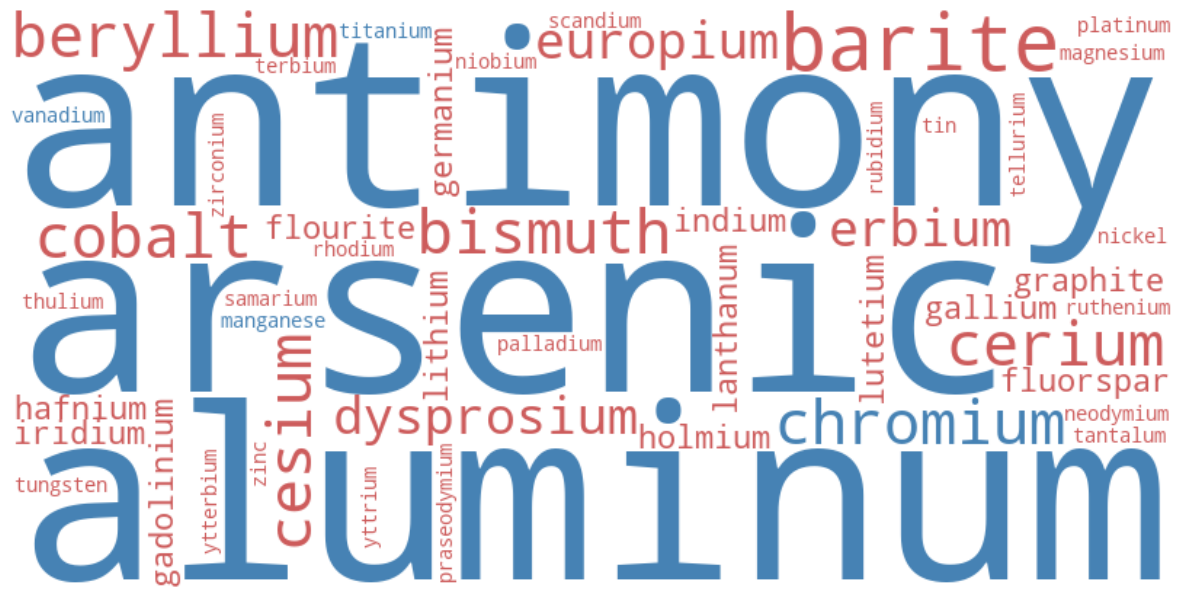

In [114]:
# Convert the list to a string for word cloud generation
text = ' '.join(critical)

# Define a color function
def color_func(word, font_size, position, orientation, random_state, **kwargs):
    return "steelblue" if word in ['aluminum','antimony','arsenic', 'chromium', 'manganese', 'titanium', 'vanadium'] else "indianred"

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func, collocations=False).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

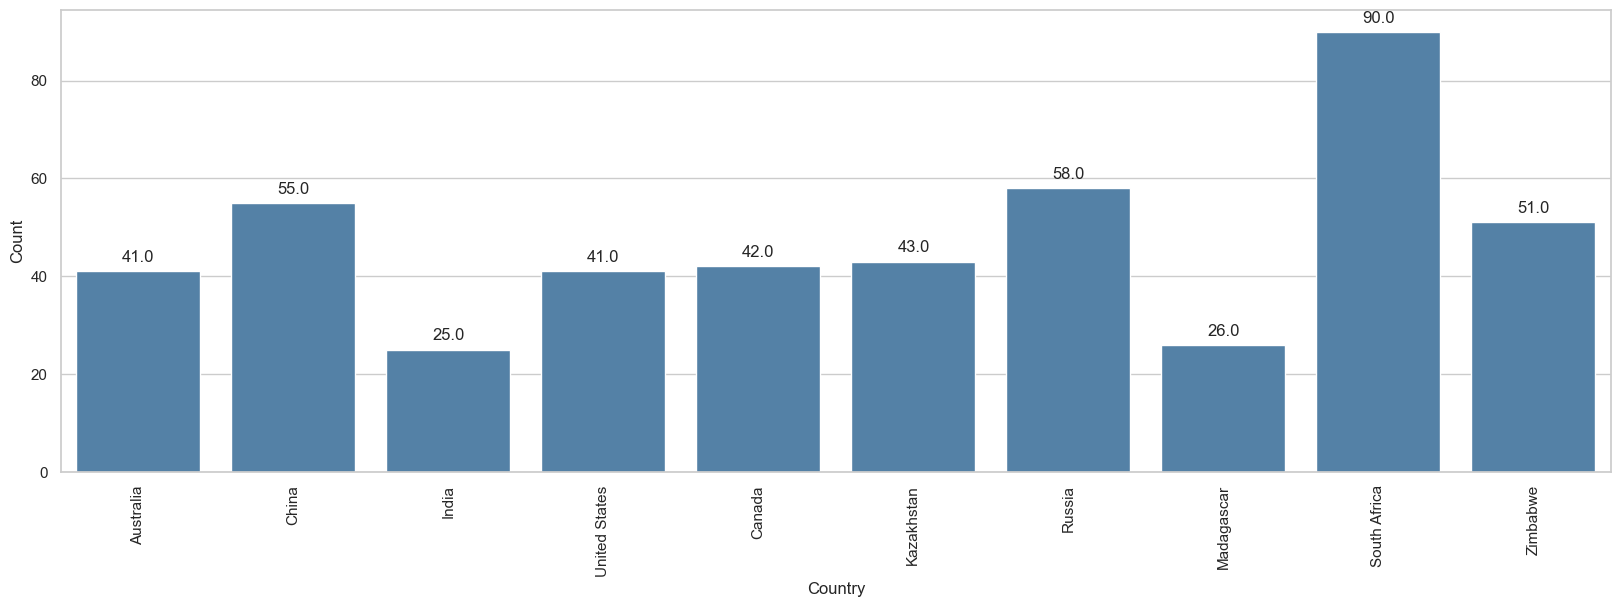

In [141]:
# Get countries with top 20 counts 
top_categories = cmin['country'].value_counts().nlargest(10).index

cmin10 = cmin[cmin['country'].isin(top_categories)]

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a count plot using Seaborn
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='country', data=cmin10, color='steelblue')
#plt.title('Critical Mineral Deposits Per Country')
plt.xlabel('Country')
plt.ylabel('Count')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Annotate bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [142]:
country_to_relation = {
    'South Africa': 'Positive',
    'Russia': 'Tension',
    'China': 'Tension',
    'Zimbabwe': 'Tension',
    'Kazakhstan': 'Positive',
    'Canada': 'Positive',
    'Australia': 'Positive',
    'United States': 'Positive',
    'Madagascar': 'Neutral',
    'India': 'Positive'
}


cmin10['diplomatic relations'] = cmin10['country'].map(country_to_relation)

cmin10.head()

,country,mineral,diplomatic relations
16,Australia,aluminum,Positive
17,Australia,aluminum,Positive
18,Australia,aluminum,Positive
19,Australia,aluminum,Positive
20,Australia,barite,Positive


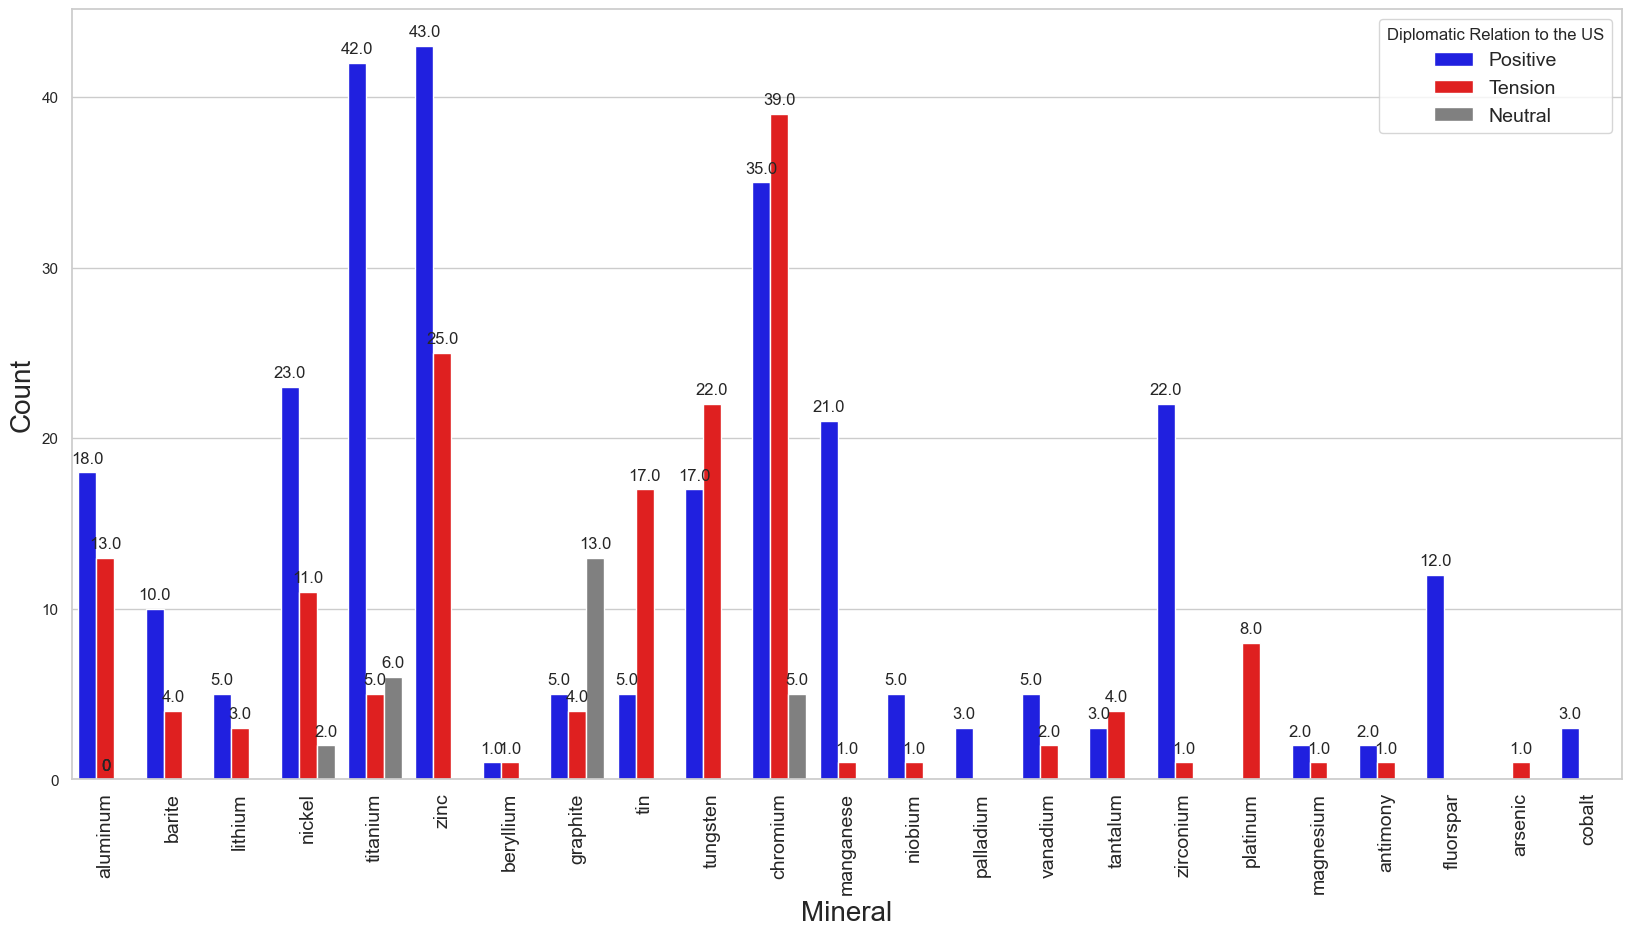

In [155]:
# Define custom palette
custom_palette = {'Positive': 'blue', 'Neutral': 'grey', 'Tension': 'red'}

# Create a count bar plot grouped by the color 
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='mineral', hue='diplomatic relations', data=cmin10, palette=custom_palette)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#plt.title('Count Bar Plot by Country and Relationship')
plt.xlabel('Mineral', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.legend(title='Diplomatic Relation to the US', fontsize = 14)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Increase x-axis tick label font size
ax.tick_params(axis='x', which='major', labelsize=14)

plt.show()